# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

In [ ]:
!pip install pandas-profiling==2.8.0
!pip install tqdm
!pip install matplotlib==3.4


# chargement des librairies

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport
# import chardet 
import os
from google.colab import drive
import warnings
import warnings; warnings.filterwarnings(action='once')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
large = 18; med = 14; small = 11
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (16, 8),
          'axes.labelsize': small,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': med}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
pd.set_option('display.max_columns', None)

In [ ]:
#function to display values on bars or pies
def show_values_on_bars(axs):
  def _show_on_single_plot(ax):        
      for p in ax.patches:
          _x = p.get_x() + p.get_width() 
          _y = p.get_y() + p.get_height() / 2
          value = '{:.0f}'.format(p.get_width())
          ax.text(_x, _y, value, ha="center") 

  if isinstance(axs, np.ndarray):
      for idx, ax in np.ndenumerate(axs):
          _show_on_single_plot(ax)
  else:
      _show_on_single_plot(axs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#identification de l'encodage
with open('/content/drive/MyDrive/Speed/Speed Dating Data.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.7292458070575607, 'language': ''}


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Speed/Speed Dating Data.csv',sep=',',encoding='Windows-1252', engine='python')


# Unique people characteristics

In [ ]:

# a person attend several rounds of meetings.
#we can just focus on its unique characteristics.
df = df2[['iid', 'wave',
        'gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es',
       'match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met','satis_2', 'length', 'numdat_2',
       'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']].drop_duplicates(subset=['iid'])
df.describe()

,iid,wave,gender,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,match,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
count,551.000000,551.000000,551.000000,543.000000,544.000000,545.000000,544.000000,544.000000,544.000000,543.000000,544.000000,539.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,543.000000,126.000000,479.000000,551.000000,551.000000,542.000000,537.000000,537.000000,530.000000,511.000000,482.000000,539.000000,536.000000,534.000000,485.000000,485.000000,482.000000,263.000000,263.000000,263.000000,93.000000,40.000000
mean,276.787659,11.083485,0.502722,26.359116,7.549632,2.800000,3.733456,3.582721,2.148897,4.983425,2.143382,5.250464,6.395221,4.549632,6.286765,7.775735,6.972426,6.689338,5.757353,3.840074,5.751838,7.647059,5.325368,6.761029,7.898897,6.843750,7.875000,5.604779,4.415441,5.519337,5.888889,3.026931,0.150635,0.408348,5.916052,7.227188,7.416201,6.301887,6.761252,5.464730,6.091837,5.177239,0.986891,5.676289,1.861856,2.311203,0.749049,0.889734,0.357414,1.172043,0.875000
std,159.494486,6.013947,0.500447,3.766960,3.772699,1.253818,2.842181,2.784553,1.448273,1.468520,1.104833,3.312471,2.630753,2.801164,2.449965,1.778032,2.059245,2.273435,2.566239,2.610746,2.485871,2.002869,2.539344,2.273611,1.720550,2.154151,1.788803,2.615307,2.757915,1.729677,5.127529,2.346796,0.358018,0.491975,2.003892,1.696288,1.620893,1.981816,1.886418,2.191412,1.834310,2.187544,0.975217,1.804595,0.976738,0.690475,1.729225,1.301500,0.480152,1.185269,0.757442
min,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.500000,6.000000,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,1.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.750000,7.000000,4.000000,2.000000,5.000000,2.000000,1.750000,0.000000,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,277.000000,11.000000,1.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,4.000000,2.500000,0.000000,0.000000,6.000000,7.000000,8.000000,6.000000,7.000000,5.500000,6.000000,5.000000,1.000000,6.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,414.500000,15.000000,1.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,8.250000,7.000000,8.000000,9.000000,8.250000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000000,9.000000,4.000000,0.000000,1.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000,7.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,552.000000,21.000000,1.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10

In [ ]:
df.shape

(551, 59)

## General exploration

In [ ]:
report = ProfileReport(
    df,  html={"style": {"full_width": True}}, sort="None", minimal=True
)
report

Summarize dataset:   0%|          | 0/69 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report.to_file("/content/drive/MyDrive/Speed/report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data processing

The previous step showed some features with an extremely high cardinality (text)

field : 259 distinct values	
undergra : 241 distinct values	
mn_sat : 68 distinct values	
tuition : 115 distinct values	
from : 269 distinct values	
zipcode : 409 distinct values	
career: 367 distinct values

We will therefore remove these fields from the analysis

In [ ]:
df = df[['iid', 
        'gender', 'age', 'field_cd', 
        'race', 'imprace', 'imprelig', 
       'income', 'goal', 'date', 'go_out', 
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',]] 

# Gender mapping

In [ ]:
df['gender'] = df['gender'].map({0:'women', 1:'men'})

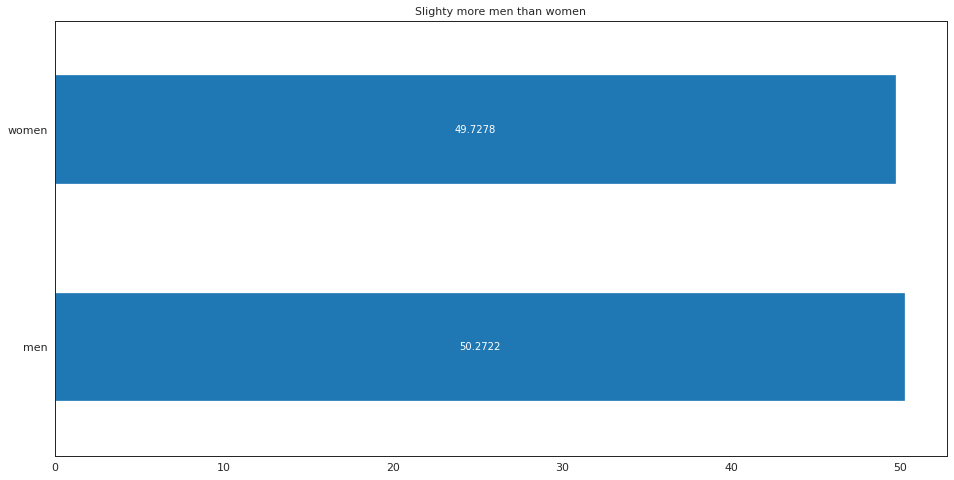

In [ ]:
ax=df.gender.value_counts(normalize=True).mul(100).plot(kind='barh')
plt.title('Slighty more men than women')

for c in ax.containers:
    ax.bar_label(c, label_type='center', color='white')


age distribution by gender

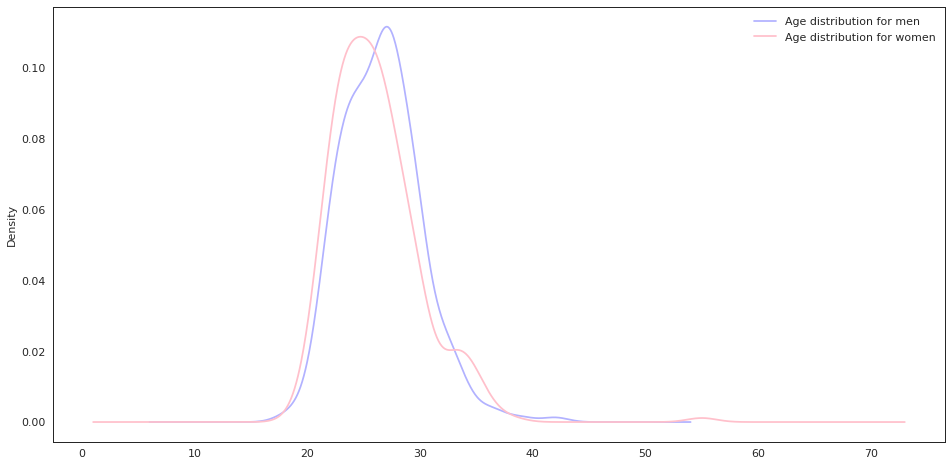

In [ ]:

plt.figure()

df[df.gender=='men'].age.plot(kind='kde', color='blue' ,alpha=0.3, label='Age distribution for men')
df[df.gender=='women'].age.plot(kind='kde', color='pink', label='Age distribution for women')
plt.legend()
plt.show()


Similar distribution in ages among men and women, with probably more older men.

Let us see the age repartition by age range : 

In [ ]:
# Summarize ages through specific dataset
df['age'] = df.age.fillna(int(df.age.mean()))
df['age_c'] = ['<20' if x <20 else '<25' if x <25  else '<30' if x <30   else '>30' for x in df['age']]
dataset = df.groupby(by='age_c')['gender'].value_counts(normalize=True).mul(100).to_frame().rename(columns={'gender' : 'count'}).reset_index('gender')

# To get a good age pyramid chart, we need to negate the values of one of the categorical variables. In this case, women.
def minus(x,y):
  if y == 'women':
    x = -1 * x
  return round(x,0)

dataset['count'] = dataset.apply(lambda x: minus(x['count'], x['gender']), axis=1)
dataset

,gender,count
age_c,,
<20,men,67.0
<20,women,-33.0
<25,women,-56.0
<25,men,44.0
<30,men,53.0
<30,women,-47.0
>30,men,54.0
>30,women,-46.0


We can now draw our pyramide chart to enhance the difference in age among men and women

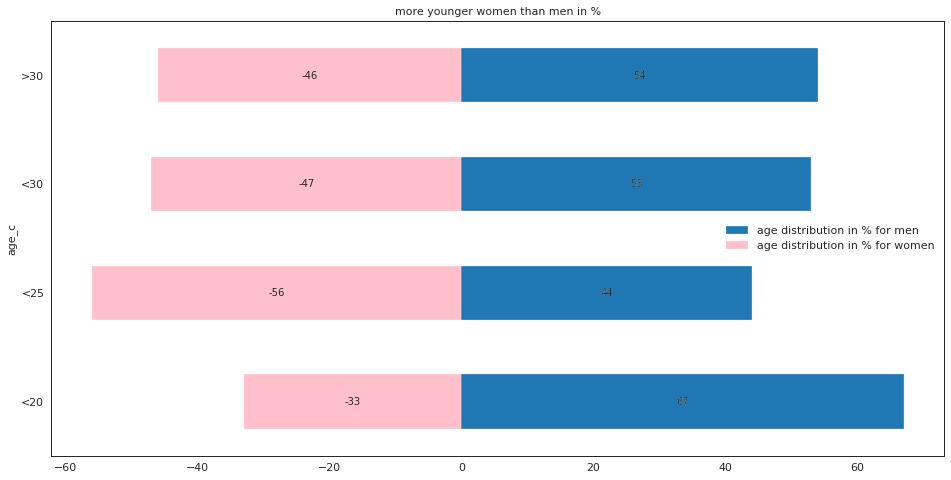

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

m = dataset[dataset.gender == 'men']['count'].sort_index().plot(kind='barh', label = 'age distribution in % for men')

for c in ax.containers:
    ax.bar_label(c, label_type='center',color='white')
w = dataset[dataset.gender == 'women']['count'].sort_index().plot(kind='barh', color='pink', label = 'age distribution in % for women')
for c in ax.containers:
    ax.bar_label(c, label_type='center')
plt.title('more younger women than men in %')
plt.legend(loc='best')
plt.show()


# Origin mapping

In [ ]:
df['race'] = df['race'].fillna(0) #6 people
df['race'] = ['Black' if x == 1 else 'European' if x ==2  else 'Latino' if x == 3 else 'Asian' if x == 4 else 'Native' if x == 5 else 'Other' for x in df['race']]

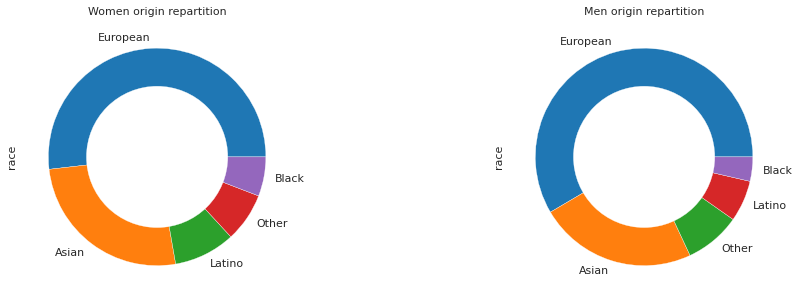

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
df[df.gender =='women'].race.value_counts().plot(kind='pie')
plt.title('Women origin repartition')
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,2,2)
df[df.gender =='men'].race.value_counts().plot(kind='pie',)
plt.title('Men origin repartition')
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


Europeans and Asians are over-represented among both men and women
with probably older men.
slightly more Asian girls than boys; slightly more european boys than girls

# Let's see the race repartition by age

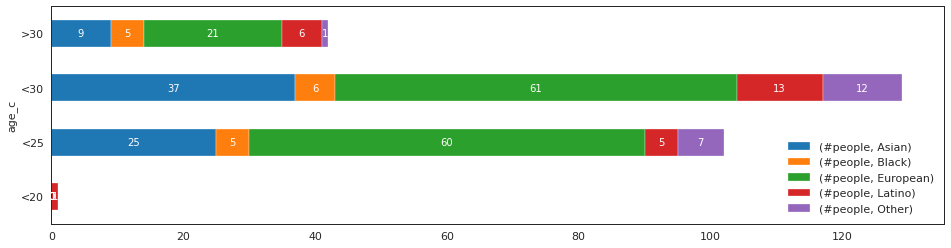

In [ ]:

ax = df[df.gender=='women'].groupby(by=[ 'age_c','race'])['race'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(kind='barh', stacked=True, label = 'race_repartition by age range');
for c in ax.containers:
    ax.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.show()


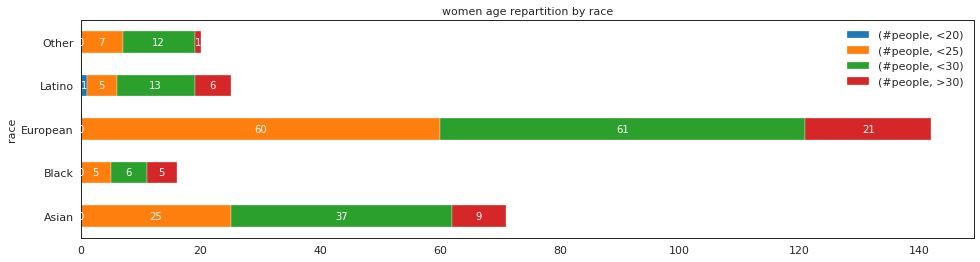

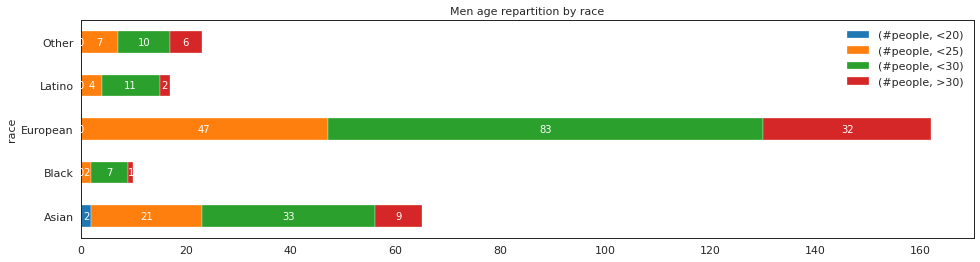

In [ ]:
#Age repartition by race & gender

ax1 = df[df.gender=='women'].groupby(by=['race', 'age_c'])['age_c'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(stacked=True, kind= 'barh')
for c in ax1.containers:
    ax1.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('women age repartition by race');


ax2 = df[df.gender=='men'].groupby(by=['race', 'age_c'])['age_c'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(stacked=True, kind= 'barh')
for c in ax2.containers:
    ax2.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('Men age repartition by race');

Europeans and Asians are the most commonly found.
It is among the Europeans men that we find the most people over 25 years old, regardless of gender.


# Let us plot the the race repartition by age range

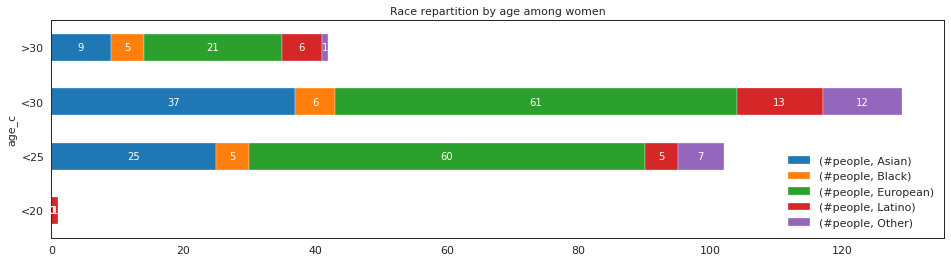

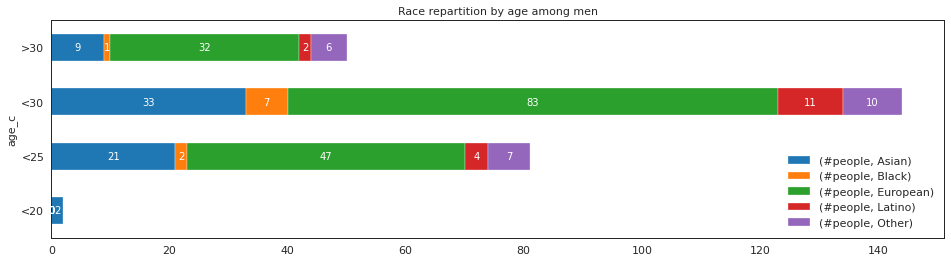

In [ ]:
ax1 = df[df.gender=='women'].groupby(by=[ 'age_c','race'])['race'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(kind='barh', stacked=True)
for c in ax1.containers:
    ax1.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('Race repartition by age among women');


ax2 = df[df.gender=='men'].groupby(by=[ 'age_c','race'])['race'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(kind='barh', stacked=True)
for c in ax2.containers:
    ax2.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('Race repartition by age among men');

# Are there significant disparities among men and women in terms of education  ?

In [ ]:
df['field_cd'].fillna(0, inplace=True)

education = { 
              0 : 'unknown',
              1 : 'Law ',
              2 : 'Math',
              3 : 'Social Science',
              4 : 'Medical Science',
              5 : 'Engineering  ',
              6 : 'Litterature',
              7 : 'History',
              8 : 'Business',
              9 : 'Education',
              10 : 'Sciences',
              11 : 'Social Work ',
              12 : 'Undergrad',
              13: 'Political Affairs ',
              14 : 'Film',
              15 : 'Fine Arts',
              16: 'Languages',
              17 : 'Architecture',
              18 : 'Other'}

df['field_cd'] = df.field_cd.map(education)

<Figure size 1152x576 with 0 Axes>

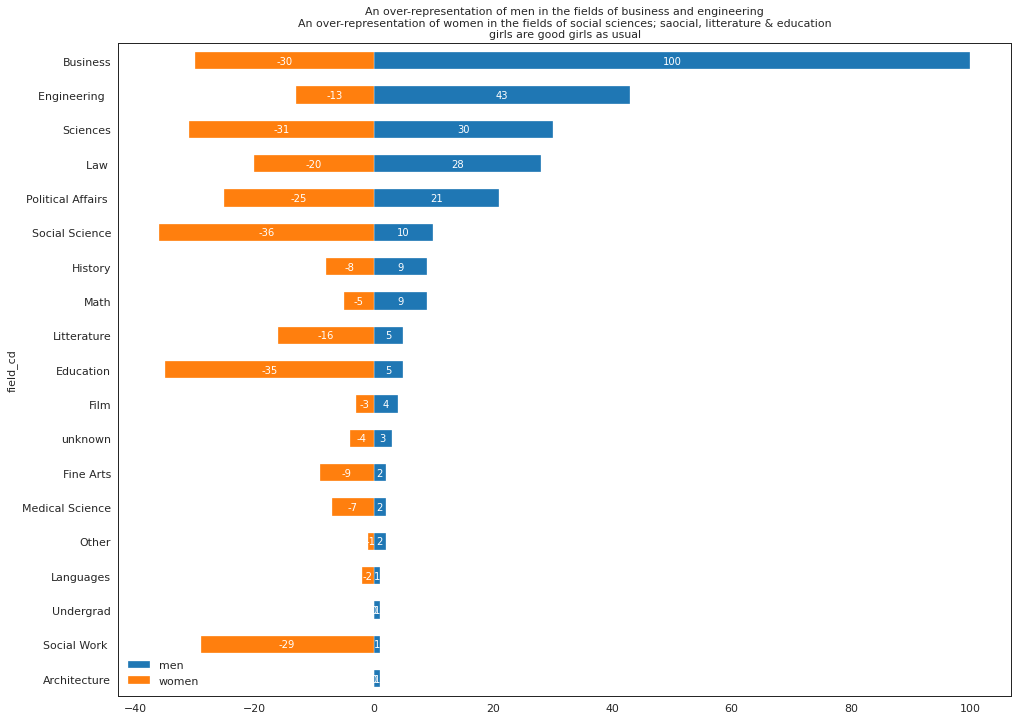

In [ ]:
temp = df.groupby(by=['field_cd', 'gender'])['gender'].agg('count').unstack().fillna(0)
temp.women = temp.apply(lambda x: -1 * x['women'], axis=1)

fig = plt.figure()
ax = temp.sort_values(by='men', ascending=True).plot(kind='barh',stacked=True, figsize=(16,12))
for c in ax.containers:
    ax.bar_label(c, label_type='center', color = 'white' )
plt.legend(loc='best')
plt.title('An over-representation of men in the fields of business and engineering\nAn over-representation of women in the fields of social sciences; saocial, litterature & education\ngirls are good girls as usual')
plt.show()

# Does a high standard of living lead to more dates?

We reload our dataset to make sure we get all records with a income values

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Speed/Speed Dating Data.csv',sep=',',encoding='Windows-1252', engine='python')
data.dropna(subset=['income']).drop_duplicates(subset=['iid'])

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,"77,096","37,754.00",1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,24.14,13.79,20.69,27.59,10.34,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,0,9,1,1,10,4,NaN,1,1,11.0,0,-0.43,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.

In [ ]:
# Let's have a look at the income missing records
data.income.isna().sum()/len(data.income) * 100

48.92575793745524

Approximately 50% of income records are missing !

In [ ]:
# # We shall drop these records
data_revenue = data.dropna(subset=['income'])



In [ ]:
data_revenue = data_revenue[['gender', 'age', 'race',  'imprace', 'imprelig', 
       'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'exphappy', 'expnum', 'match_es', 'match', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
       'satis_2', 'length', 'numdat_2', 'you_call', 'them_cal', 'date_3',
       'numdat_3', 'num_in_3']][(data.wave == 1)]

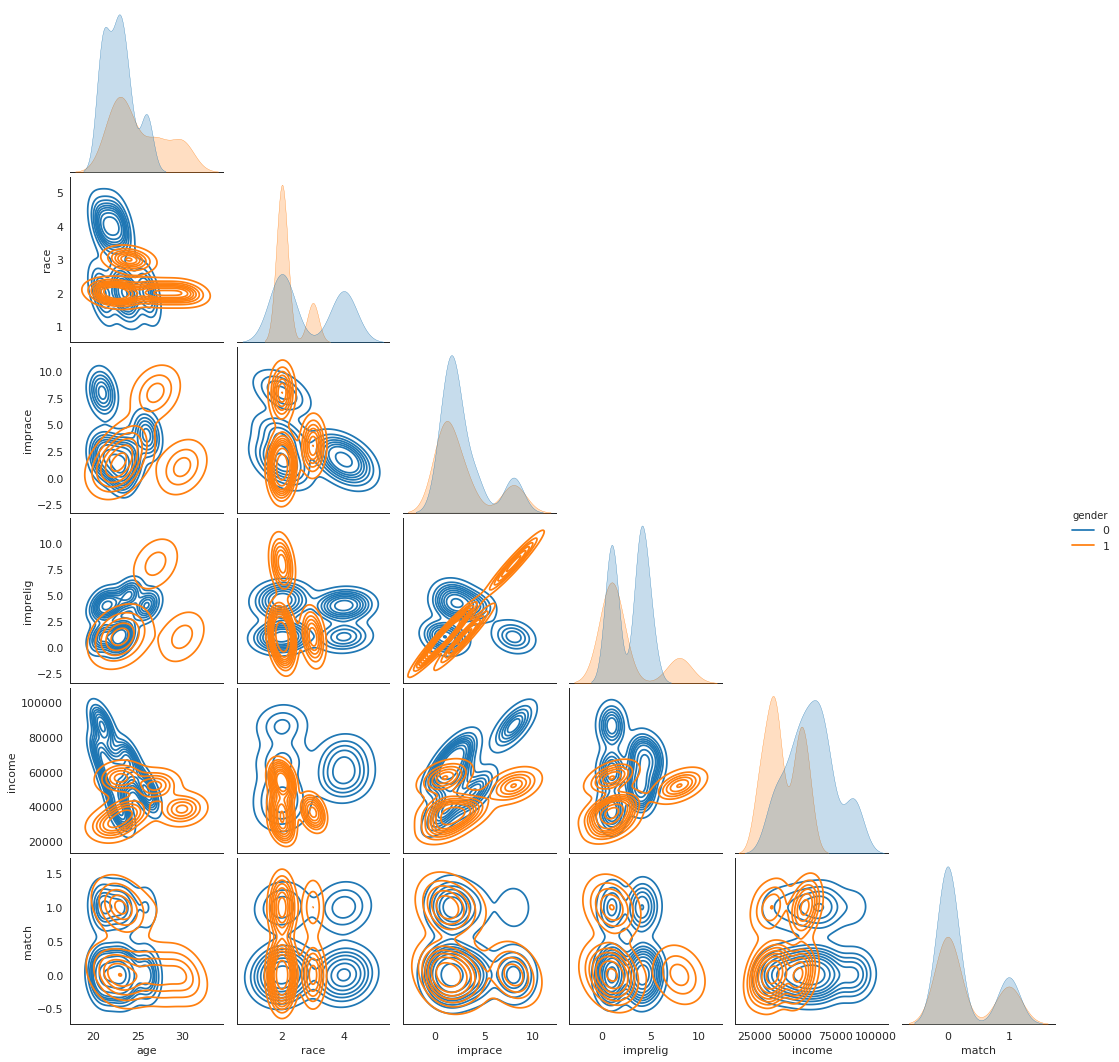

In [ ]:
# We need to clean the income records
def _int(x):
  if x!=0:
    x = str(x)
    x = int(x[0:x.find('.')].replace(',',''))
  return x

data_revenue['income'] = data_revenue.apply(lambda x: _int(x['income']), axis=1)
sns.pairplot(data_revenue[['age', 'gender','race', 'imprace', 'imprelig', 
       'income', 'match']], hue='gender',corner=True,kind="kde");



# the only clear correlation we can discern is see  girls who place a lot of importance on religion place a lot of importance on the race of their partner

# Any other correlations?

In [ ]:
!pip install phik

In [ ]:
small = df2[[ 'gender', 'age', 'field_cd',  'race', 'imprace', 'imprelig',  'goal', 'date', 'go_out', 'career_c', 'match']]

In [ ]:
check = small.corr() 
check[abs(check) > 0.3].fillna('')


,gender,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,match
gender,1,,,,,,,,,,
age,,1,,,,,,,,,
field_cd,,,1,,,,,,,0.353927,
race,,,,1,,,,,,,
imprace,,,,,1,0.430284,,,,,
imprelig,,,,,0.430284,1,,,,,
goal,,,,,,,1,,,,
date,,,,,,,,1,0.336955,,
go_out,,,,,,,,0.336955,1,,
career_c,,,0.353927,,,,,,,1,


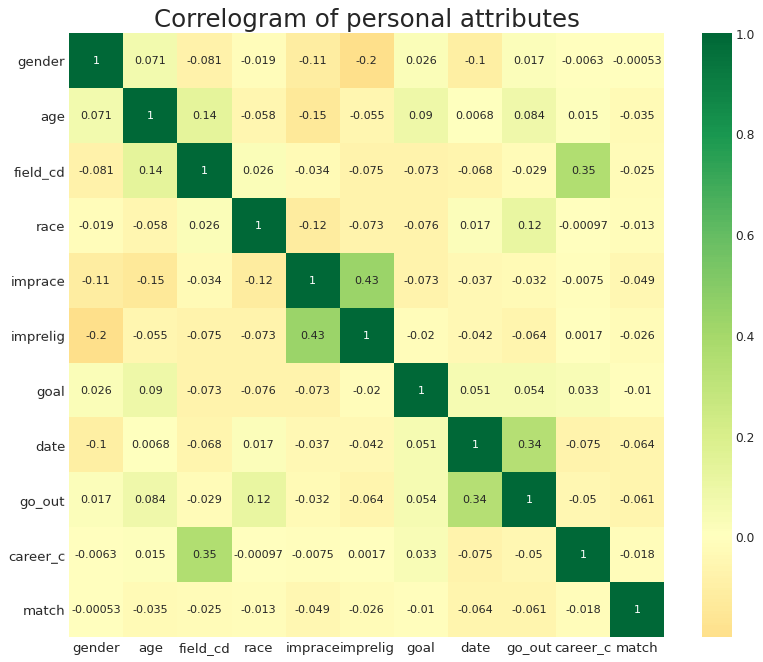

In [ ]:

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(small.corr(), xticklabels=small.corr().columns, yticklabels=small.corr().columns, cmap='RdYlGn', center=0, annot=True, )

# Decorations
plt.title('Correlogram of personal attributes', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12,rotation=0.3)
plt.show()

# Nothing very obvious: there is the fact that the type of study influences the career, and that there is a link between race and religion (...) But no attribute is correlated with a second date

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
